
## 01MIAR - Actividad Video Valencia Pollution

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 29/11/2024 00:00 - 29/11/2024 23:59

#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- parámetros: parámetroe medidos
- mediciones: fichero de mediciones
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire
- fiwareid: 
- geo_shape: coordenadas geográficas
- geo_point_2d: latitud-longitud

**Nombre:**     Antonio J. Bonafede S.

**URL:**        "https://valencia.opendatasoft.com/api/explore/v2.1/catalog/datasets/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/records"

**Solución:**   https://github.com/bonafedeaviu/Valencia

In [1]:
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator, DayLocator

from datetime import datetime

## 01
Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame

In [2]:
path_csv = ['res', 'valencia_pollution_dataset.csv']
path_csv_solved = path.join(*path_csv)
df = pd.read_csv(path_csv_solved)
df.sample(10)

,objectid,nombre,direccion,tipozona,parametros,mediciones,so2,no2,o3,co,pm10,pm25,tipoemision,fecha_carga,calidad_ambiental,fiwareid,geo_shape,geo_point_2d
162,28,Viveros,Jardines de Viveros,Urbana,NaN,NaN,0.0,17,66.0,NaN,NaN,NaN,Fondo,2025-05-25T13:20:11+00:00,Razonablemente Buena,NaN,NaN,NaN
228,430,Dr. Lluch,"Calle Dr. Lluch, 48",Urbana,NaN,NaN,NaN,1,NaN,NaN,24.0,9.0,Tráfico,2025-05-25T19:20:12+00:00,Razonablemente Buena,NaN,NaN,NaN
365,430,Dr. Lluch,"Calle Dr. Lluch, 48",Urbana,NaN,NaN,NaN,12,NaN,NaN,24.0,10.0,Tráfico,2025-05-26T08:20:12+00:00,Razonablemente Buena,NaN,NaN,NaN
224,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,NaN,NaN,NaN,14,NaN,NaN,19.0,10.0,Tráfico,2025-05-25T19:20:13+00:00,Buena,NaN,NaN,NaN
134,432,Patraix,"Archiduque Carlos, 84ac",Urbana,NaN,NaN,NaN,14,NaN,NaN,18.0,10.0,Tráfico,2025-05-25T11:20:15+00:00,Buena,NaN,NaN,NaN
327,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,NaN,NaN,0.0,7,75.0,0.7,7.0,3.0,Tráfico,2025-05-26T04:20:06+00:00,Razonablemente Buena,NaN,NaN,NaN
364,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,NaN,NaN,NaN,29,NaN,NaN,20.0,11.0,Tráfico,2025-05-26T08:20:13+00:00,Razonablemente Buena,NaN,NaN,NaN
377,28,Viveros,Jardines de Viveros,Urbana,NaN,NaN,0.0,14,46.0,NaN,NaN,NaN,Fondo,2025-05-26T09:20:08+00:00,Buena,NaN,NaN,NaN
243,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,NaN,NaN,NaN,20,NaN,NaN,19.0,10.0,Tráfico,2025-05-25T21:20:13+00:00,Buena,NaN,NaN,NaN
157,430,Dr. Lluch,"Calle Dr. Lluch, 48",Urbana,NaN,NaN,NaN,15,NaN,NaN,24.0,9.0,Tráfico,2025-05-25T13:20:12+00:00,Razonablemente Buena,NaN,NaN,NaN


## Descripcion de los contaminantes registrados

<img src="contaminantes.jpg" width="900"/>

## 02
- ¿Cuál es el rango temporal del dataset?
- Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

In [3]:
# ¿Cuál es el rango temporal del dataset?

# Convertir la fecha para calculos
df['fecha_carga'] = pd.to_datetime(df['fecha_carga'])

# Cuándo empieza la medición (fecha más antigua)
fecha_inicio = df['fecha_carga'].min()
print("1. ¿Cuándo empieza la medición?")
print(f"   Fecha de inicio: {fecha_inicio.strftime('%d/%m/%Y %H:%M:%S')}")
print()

# Cuándo termina la medición (fecha más reciente)
fecha_fin = df['fecha_carga'].max()
print("2. ¿Cuándo termina la medición?")
print(f"   Fecha de fin: {fecha_fin.strftime('%d/%m/%Y %H:%M:%S')}")
print()

# Rango temporal del dataset
rango_temporal = fecha_fin - fecha_inicio
print("3. ¿Cuál es el rango temporal del dataset?")
print(f"   Rango total: {rango_temporal}")
print(f"   Días totales: {rango_temporal.days}")
print(f"   Horas totales: {rango_temporal.total_seconds() / 3600:.2f}")
print()

1. ¿Cuándo empieza la medición?
   Fecha de inicio: 24/05/2025 20:20:04

2. ¿Cuándo termina la medición?
   Fecha de fin: 26/05/2025 10:20:13

3. ¿Cuál es el rango temporal del dataset?
   Rango total: 1 days 14:00:09
   Días totales: 1
   Horas totales: 38.00



In [4]:
# Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

# Supuesto: NaN indican que no tienen sensor - en caso de valor 0 se consideraria valido (no se presenta en este dataset )

# Filtrar solo estaciones que tienen datos de CO (no NaN)
df_con_co = df[df['co'].notna()]

# Validar que existan datos de CO
if len(df_con_co) > 0:
    # Obtener estaciones que tienen datos de CO
    estaciones_info = df_con_co[['objectid', 'nombre', 'co']].drop_duplicates().sort_values('objectid')
    num_estaciones = len(estaciones_info)
    num_estaciones_total = len(df[['objectid', 'nombre']].drop_duplicates())

    # Enumerarlas e imprimir el total
    print("\nListado de estaciones con datos de CO:\n")
    print(f"   {'Nro de Estacion':<15} {'Estacion'}")
    print(f"   {'-'*15} {'-'*30}")
    for _, row in estaciones_info.iterrows():
        print(f"   {row['objectid']:<15} {row['nombre']}")
        
else:
    print("No se encontraron datos de monóxido de carbono (CO) en el dataset.")
    print("Todas las estaciones tienen valores NaN para CO.")


Listado de estaciones con datos de CO:

   Nro de Estacion Estacion
   --------------- ------------------------------
   23              Francia
   25              Molí del Sol
   26              Pista de Silla


## 03

- Número de estación con la media más alta de mediciones de monóxido de carbono

In [5]:
# Número de estación con la media más alta de mediciones de monóxido de carbono

# Calcular estadísticas de CO por estación
estadisticas_co = df_con_co.groupby(['objectid', 'nombre'])['co'].agg([
    'mean', 'max', 'min', 'count'
]).round(4)

# Volver el indice al Dataframe
estadisticas_co = estadisticas_co.reset_index()

# Ordenar por media descendente para encontrar la estación con media más alta
estadisticas_co = estadisticas_co.sort_values('mean', ascending=False)

# Destacar la estación con la media más alta
estacion_media_mas_alta = estadisticas_co.iloc[0]
print("Estacion con la media mas alta de CO:\n")
print(f"{'-'*15} {'-'*25}")
print(f"Nro de Estación: {estacion_media_mas_alta['objectid']}")
print(f"Nombre: {estacion_media_mas_alta['nombre']}")
print(f"Medición más alta: {estacion_media_mas_alta['max']:.4f}")
print(f"Medición más baja: {estacion_media_mas_alta['min']:.4f}")
print(f"Medición media: {estacion_media_mas_alta['mean']:.4f}\n")
print(f"Total de registros: {estacion_media_mas_alta['count']}")


Estacion con la media mas alta de CO:

--------------- -------------------------
Nro de Estación: 26
Nombre: Pista de Silla
Medición más alta: 0.7000
Medición más baja: 0.7000
Medición media: 0.7000

Total de registros: 36


## 04
Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

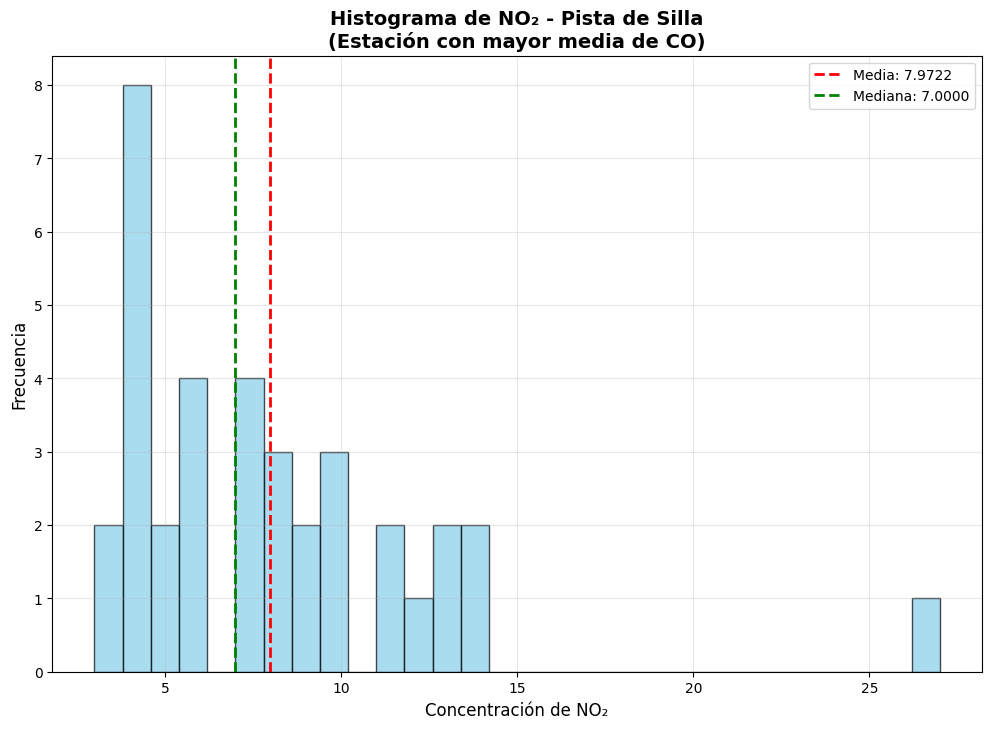

In [6]:
# Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

# Filtrar datos de NO2 para la estación con mayor media de CO
datos_no2_estacion = df_con_co[
    df_con_co['objectid'] == estacion_media_mas_alta['objectid']]['no2'].dropna()

# Verificar si hay datos de NO2 para esta estación
if len(datos_no2_estacion) > 0:
    
    # Crear el histograma
    plt.figure(figsize=(12, 8))
    n, bins, patches = plt.hist(datos_no2_estacion, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=False)
    
    # Calcular estadísticas basicas
    media_no2 = datos_no2_estacion.mean()
    mediana_no2 = datos_no2_estacion.median()
    std_no2 = datos_no2_estacion.std()

    # Añadir líneas de referencia
    plt.axvline(media_no2, color='red', linestyle='--', linewidth=2, label=f'Media: {media_no2:.4f}')
    plt.axvline(mediana_no2, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana_no2:.4f}')
    
    # Configurar el gráfico
    plt.xlabel('Concentración de NO₂', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.title(f'Histograma de NO₂ - {estacion_media_mas_alta["nombre"]}\n' 
              f'(Estación con mayor media de CO)', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

else:
    print("No hay datos de NO₂ disponibles para esta estación")
    

## 05
Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

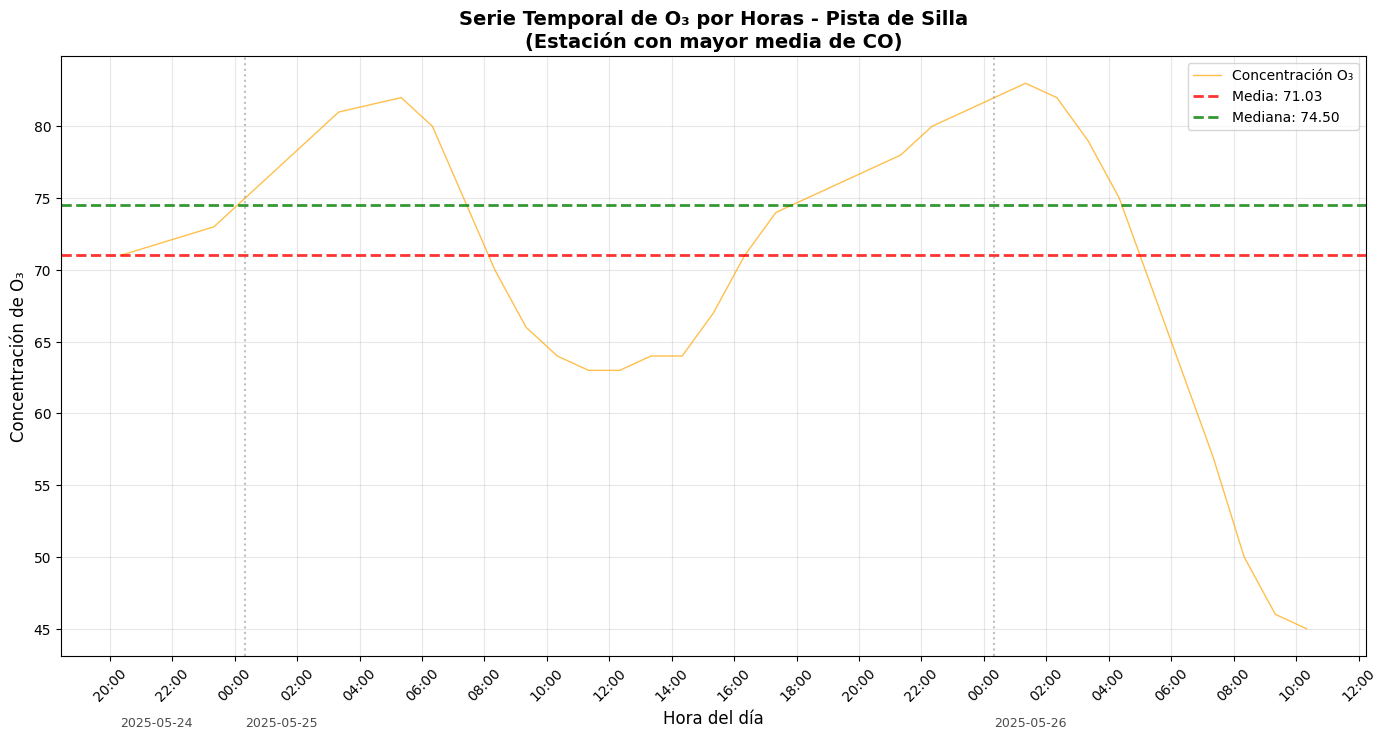

In [7]:
# Realizar gráfica con la línea temporal de las mediciones de ozono de la estación del punto anterior. 

# Filtrar datos de O3 para la estación con mayor media de CO
datos_o3_estacion = df_con_co[
    (df_con_co['objectid'] == estacion_media_mas_alta['objectid']) & 
    (df_con_co['o3'].notna())
].copy()

# Verificar si hay datos de O3 para esta estación
if len(datos_o3_estacion) > 0:

    # Extraer hora y día de la fecha
    datos_o3_estacion['hora'] = datos_o3_estacion['fecha_carga'].dt.hour
    datos_o3_estacion['dia'] = datos_o3_estacion['fecha_carga'].dt.date
    
    # Ordenar por fecha para mantener orden cronológico
    datos_o3_estacion = datos_o3_estacion.sort_values('fecha_carga')
    
    # Crear la gráfica temporal
    plt.figure(figsize=(15, 8))
    
    # Gráfica de línea continua usando la fecha completa
    plt.plot(datos_o3_estacion['fecha_carga'], datos_o3_estacion['o3'], 
             color='orange', linewidth=1, alpha=0.7, label='Concentración O₃')
    
    # Calcular estadísticas básicas
    media_o3 = datos_o3_estacion['o3'].mean()
    mediana_o3 = datos_o3_estacion['o3'].median()
    
    # Líneas de referencia horizontales
    plt.axhline(y=media_o3, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {media_o3:.2f}', alpha=0.8)
    plt.axhline(y=mediana_o3, color='green', linestyle='--', linewidth=2, 
                label=f'Mediana: {mediana_o3:.2f}', alpha=0.8)
    
    # Configurar el gráfico
    plt.xlabel('Hora del día', fontsize=12)
    plt.ylabel('Concentración de O₃', fontsize=12)
    plt.title(f'Serie Temporal de O₃ por Horas - {estacion_media_mas_alta["nombre"]}\n'
              f'(Estación con mayor media de CO)', 
              fontsize=14, fontweight='bold')
    
    # Personalizar el eje X para mostrar horas y días
    ax = plt.gca()
    
    # Formato para mostrar solo la hora
    hour_fmt = DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(hour_fmt)
    
    # Localizadores para horas cada 2 horas
    ax.xaxis.set_major_locator(HourLocator(interval=2))
    
    # Añadir separadores verticales entre días
    dias_cambio = datos_o3_estacion.groupby('dia')['fecha_carga'].min()
    for i, fecha_cambio in enumerate(dias_cambio):
        if i > 0:  # No dibujar línea al inicio
            plt.axvline(x=fecha_cambio, color='gray', linestyle=':', alpha=0.5)
    
    # Añadir etiquetas de días en la parte inferior del gráfico
    ylim = ax.get_ylim()
    for i, (dia, fecha_min) in enumerate(dias_cambio.items()):
        # Posicionar las etiquetas de fecha justo debajo del eje X
        ax.text(fecha_min, ylim[0] - (ylim[1] - ylim[0]) * 0.1, f'{dia}', rotation=0, ha='left', va='top', fontsize=9, alpha=0.7)
    
    # Configurar la leyenda
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Rotar etiquetas del eje X
    plt.xticks(rotation=45)
    
    # Ajustar el layout para que quepa la leyenda
    plt.subplots_adjust(bottom=0.15, top=0.9, left=0.08, right=0.95)

else:
    print("No hay datos de O₃ disponibles para esta estación.")